1. Соберите все данные из папки data в один датафрэйм, имеющий следующие столбцы: колонки из самих файлов (product_id, quantity), а также имя пользователя (name), и дата этих покупок (date), соответствует названию папки, где лежит папка с пользователем)

In [44]:
import pandas as pd
import os
import seaborn as sns

In [2]:
path_1 = "/home/jupyter-v-scherbak-20/shared/homeworks/python_ds_miniprojects/4/data/"

In [3]:
date_data = os.listdir(path_1)

In [4]:
df_2 = pd.DataFrame()
for i in date_data:
    path_2 = path_1+i
    names_data_puth = os.listdir(path_2)
    for j in names_data_puth:
        path_3 = path_2+"/"+j
        #file_data_puth = os.listdir(path_3)
        path_4 = path_3+"/data.csv"
        df_1 = pd.read_csv(path_4)
        #print(path_4)
        df_1["name"] = path_4.split("/")[-2]
        df_1["date"] = path_4.split("/")[-3]
        df_2 = df_2.append(df_1)
        #print(path_4)
#print(df)

In [5]:
df_2

,Unnamed: 0,product_id,quantity,name,date
0,0,27,4,Petr_Ivanov,2020-12-05
1,1,89,1,Petr_Ivanov,2020-12-05
2,2,33,2,Petr_Ivanov,2020-12-05
3,3,8,3,Petr_Ivanov,2020-12-05
4,4,16,1,Petr_Ivanov,2020-12-05
...,...,...,...,...,...
0,0,18,4,Petr_Fedorov,2020-12-07
1,1,94,4,Petr_Fedorov,2020-12-07
0,0,95,2,Vasiliy_Ivanov,2020-12-07
1,1,83,3,Vasiliy_Ivanov,2020-12-07


In [6]:
df_2.columns

Index(['Unnamed: 0', 'product_id', 'quantity', 'name', 'date'], dtype='object')

In [7]:
df_2 = df_2.drop(columns='Unnamed: 0')

In [8]:
df_2.reset_index(drop=True, inplace=True)

In [9]:
df_2.quantity.sum()

480

In [10]:
df_2

,product_id,quantity,name,date
0,27,4,Petr_Ivanov,2020-12-05
1,89,1,Petr_Ivanov,2020-12-05
2,33,2,Petr_Ivanov,2020-12-05
3,8,3,Petr_Ivanov,2020-12-05
4,16,1,Petr_Ivanov,2020-12-05
...,...,...,...,...
156,18,4,Petr_Fedorov,2020-12-07
157,94,4,Petr_Fedorov,2020-12-07
158,95,2,Vasiliy_Ivanov,2020-12-07
159,83,3,Vasiliy_Ivanov,2020-12-07


2. Выясните, какой пользователь купил больше всего товаров. Если их несколько, то перечислите имена через запятую с пробелом и в алфавитном порядке.

In [34]:
a = df_2.groupby("name", as_index=False) \
    .agg({"quantity": "sum"}) \
    .sort_values("quantity") \
    .query("quantity == 52") \
    .name \
    .to_list()
    #.idxmax()
print(a)

['Alexey_Smirnov', 'Petr_Smirnov']


3. Найдите топ-10 товаров по числу проданных единиц за всё время и постройте барплот. Сколько было продано единиц товара с product_id==56?

In [40]:
max_by = df_2.groupby("product_id", as_index=False) \
    .agg({"quantity": "sum"}) \
    .sort_values("quantity", ascending=False) \
    .head(10)

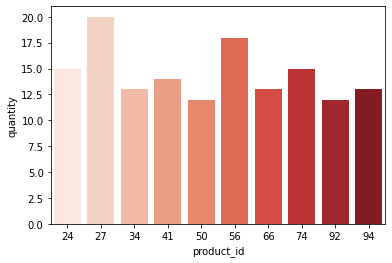

In [47]:
sns.barplot(x="product_id", y="quantity", data=max_by, palette="Reds")

4. Визуализируйте продажи по дням.

In [55]:
day_by = df_2.groupby("date", as_index=False) \
    .agg({"quantity": "sum"}) \
    .sort_values("date")

In [56]:
day_by

,date,quantity
0,2020-12-03,60
1,2020-12-04,113
2,2020-12-05,61
3,2020-12-06,15
4,2020-12-07,94
5,2020-12-08,68
6,2020-12-09,69


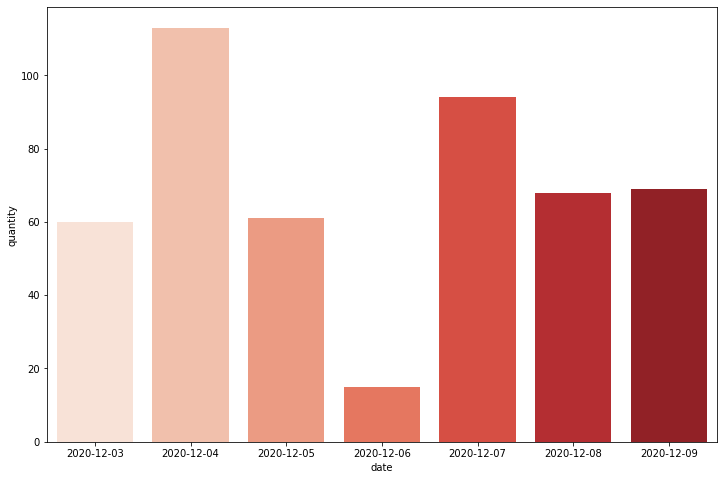

In [57]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 8))
sns.barplot(x="date", y="quantity", data=day_by, palette="Reds")

5. Сколько пользователей приобрели какой-либо товар повторно (более 1 раза)? Повтором будем считать покупку товара с одинаковым product_id, совершенную в разные дни. 

In [70]:
df_2.drop_duplicates(subset=['name', 'date', 'product_id']) \
    .groupby(["name", "product_id"]) \
    .agg({"quantity": "count"}) \
    .query("quantity > 1") \
    .shape

(2, 1)